# AI-ASSISTED REAL-TIME HEALTH PREDICTION AND NOTIFICATION SYSTEM BASED ON ENVIRONMENTAL CHANGES (EchoMedix.AI)

This project presents a comprehensive AI-powered app that predicts potential health issues in real-time based on environmental data and individual health conditions. The system integrates advanced machine learning models to analyze environmental factors such as Air Quality Index (AQI), temperature, and humidity, alongside personal health metrics (e.g., age, pre-existing conditions). Upon predicting a potential health risk, the system employs a smart notification mechanism to alert users about precautionary measures tailored to their health status.
For critical conditions where the predicted health risk is severe, the system recommends nearby hospitals, leveraging location-based services. The proposed system is designed to act as a proactive health assistant, helping users to mitigate risks and take immediate action during environmental changes. By seamlessly blending predictive analytics with real-time notifications and health management, this project aims to bridge the gap between environmental health and personalized healthcare.


Now , let's implement the AI-assisted real-time health prediction and notification system based on environmental changes using Python and its libraries. We'll use the following libraries:
- `pandas` for data manipulation and analysis
- `numpy` for numerical computations
- `scikit-learn` for machine learning
- `matplotlib` and `seaborn` for data visualization
- `joblib` for saving the model


## 1. Importing the Package

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib 
import warnings
warnings.filterwarnings('ignore')


## 2. Load the datasets

Read the dataset (health_environment_data.csv) from the data folder.

In [4]:
#loading the datasets

df = pd.read_csv("../data/health_environment_datasets.csv")
df

,user_id,age,gender,bmi,heart_rate,pre_existing_conditions,AQI,temperature,humidity,pollution_level,risk_level
0,1761,80,Female,13.8,113,Heart Disease,4,22.0,43,21.7,High
1,576,74,Male,13.1,89,Hypertension,2,36.6,75,25.8,High
2,5048,78,Female,30.5,85,NaN,3,29.5,95,56.0,High
3,2428,74,Male,13.2,96,Heart Disease,4,37.3,62,44.9,High
4,9271,33,Male,33.4,89,Cold & Cough,1,29.1,99,40.8,Low
...,...,...,...,...,...,...,...,...,...,...,...
995,4630,78,Male,30.2,70,Heart Disease,1,21.3,44,37.3,High
996,7966,30,Female,16.6,114,Allergies,4,15.2,97,75.3,High
997,6096,24,Female,17.3,75,Allergies,1,10.6,85,31.3,Low
998,8839,73,Male,31.2,104,Skin Conditions,2,10.7,30,60.8,High


## 3. Data Preprocessing

Handle missing values, encode categorical variables.


In [15]:
# Basic info of the datasets

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   bmi                      1000 non-null   float64
 4   heart_rate               1000 non-null   int64  
 5   pre_existing_conditions  909 non-null    object 
 6   AQI                      1000 non-null   int64  
 7   temperature              1000 non-null   float64
 8   humidity                 1000 non-null   int64  
 9   pollution_level          1000 non-null   float64
 10  risk_level               1000 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 86.1+ KB


summary statistics of the datasets

In [16]:
df.describe()

,user_id,age,bmi,heart_rate,AQI,temperature,humidity,pollution_level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4853.165000,48.676000,23.680600,90.409000,3.039000,25.160100,64.447000,50.094000
std,2853.822866,18.384423,6.520463,16.947594,1.409775,8.728648,20.883182,22.914589
min,4.000000,18.000000,12.600000,60.000000,1.000000,10.000000,30.000000,10.000000
25%,2382.500000,33.000000,18.000000,76.000000,2.000000,17.475000,46.000000,29.875000
50%,4743.500000,48.500000,23.800000,91.000000,3.000000,25.400000,65.000000,50.400000
75%,7340.500000,63.000000,29.425000,104.000000,4.000000,32.925000,83.000000,70.725000
max,9993.000000,80.000000,35.000000,120.000000,5.000000,40.000000,100.000000,89.800000


Checking the missing values

In [17]:
df.isnull().sum()

user_id                     0
age                         0
gender                      0
bmi                         0
heart_rate                  0
pre_existing_conditions    91
AQI                         0
temperature                 0
humidity                    0
pollution_level             0
risk_level                  0
dtype: int64

## 3.1. Exploratory Data Analysis (EDA) & Visualizations
Let's analyze the dataset with visualizations using Matplotlib and Seaborn.

### Graph for Distribution of Risk Levels

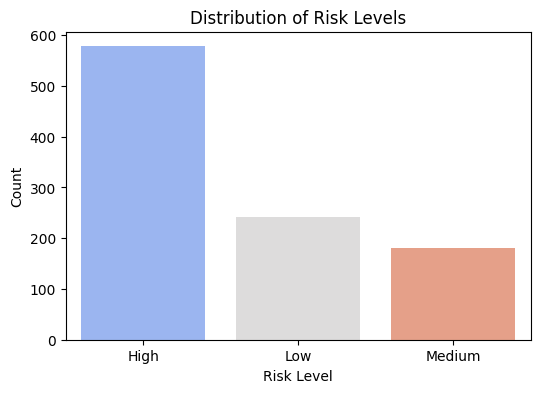

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["risk_level"], palette="coolwarm")
plt.title("Distribution of Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()


### Graph for Gender Distribution

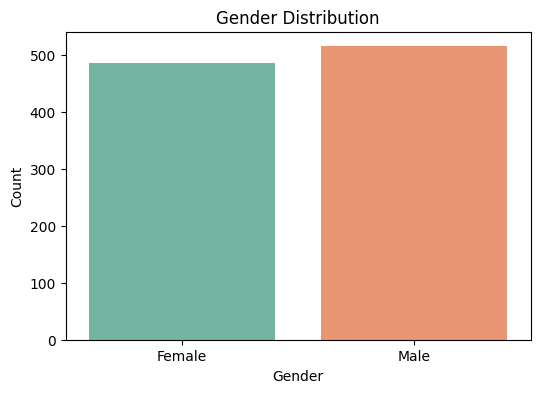

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["gender"], palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.show()


### Graph for Pre-Existing Conditions Frequency

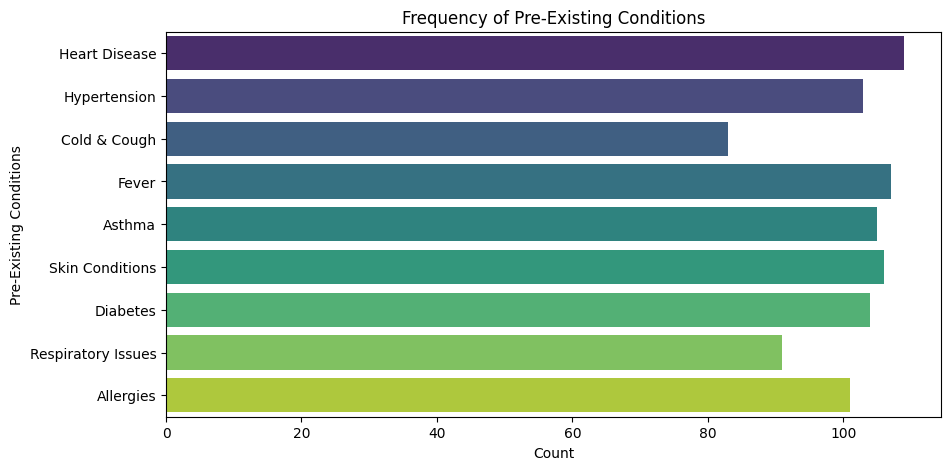

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["pre_existing_conditions"], palette="viridis")
plt.title("Frequency of Pre-Existing Conditions")
plt.xlabel("Count")
plt.ylabel("Pre-Existing Conditions")
plt.show()


### Graph for Correlation Heatmap

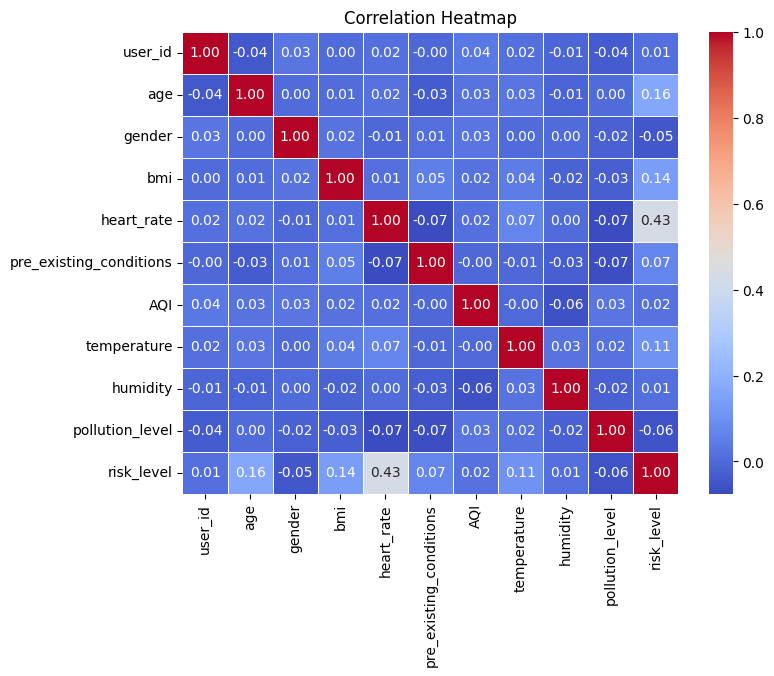

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### Boxplot of Temperature vs. Risk Level

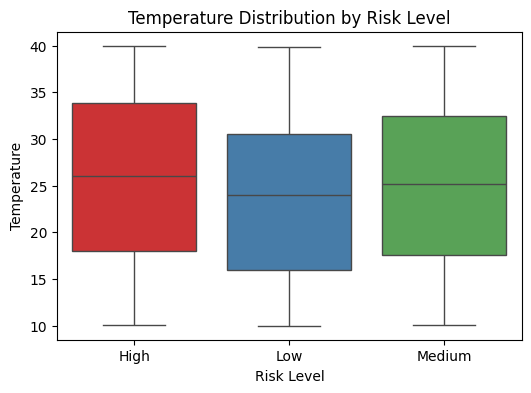

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["risk_level"], y=df["temperature"], palette="Set1")
plt.title("Temperature Distribution by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Temperature")
plt.show()


### Boxplot for AQI vs. Risk Level

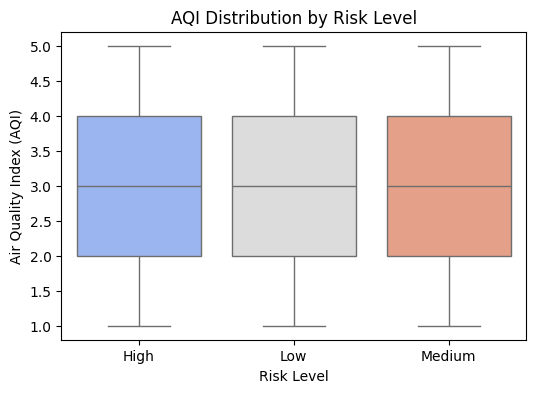

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["risk_level"], y=df["AQI"], palette="coolwarm")
plt.title("AQI Distribution by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Air Quality Index (AQI)")
plt.show()


## 3.2 Converting Catogorical Data to Numerical Data

First Checking the unique values from the Catogrical Data

In [24]:
# Specify the columns you want to check
columns_of_interest = ['gender', 'pre_existing_conditions', 'risk_level'] 

# Iterate through the specified columns and print unique values
for column in columns_of_interest:
    if column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")
    else:
        print(f"Column '{column}' does not exist in the DataFrame")

Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'pre_existing_conditions': ['Heart Disease' 'Hypertension' nan 'Cold & Cough' 'Fever' 'Asthma'
 'Skin Conditions' 'Diabetes' 'Respiratory Issues' 'Allergies']
Unique values in column 'risk_level': ['High' 'Low' 'Medium']


Mapping the catogorical data into a numerical data

In [25]:
# Define mappings
gender_mapping = {"Female": 0, "Male": 1}
pre_existing_conditions_mapping = {
    np.nan: 0,  
    "Respiratory Issues": 1,
    "Skin Conditions": 2,
    "Diabetes": 3,
    "Asthma": 4,
    "Hypertension": 5,
    "Cold & Cough": 6,
    "Heart Disease": 7,
    "Allergies": 8,
    "Fever": 9
}
risk_level_mapping = {"Low": 0, "Medium": 1, "High": 2}

# Apply mappings
df["gender"] = df["gender"].map(gender_mapping)
df["pre_existing_conditions"] = df["pre_existing_conditions"].map(pre_existing_conditions_mapping)
df["risk_level"] = df["risk_level"].map(risk_level_mapping)

# Check the first few rows
df.head()


,user_id,age,gender,bmi,heart_rate,pre_existing_conditions,AQI,temperature,humidity,pollution_level,risk_level
0,1761,80,0,13.8,113,7,4,22.0,43,21.7,2
1,576,74,1,13.1,89,5,2,36.6,75,25.8,2
2,5048,78,0,30.5,85,0,3,29.5,95,56.0,2
3,2428,74,1,13.2,96,7,4,37.3,62,44.9,2
4,9271,33,1,33.4,89,6,1,29.1,99,40.8,0


Checking the Null values is present or not and removing the unwanted column

In [6]:
# Drop user_id (not needed for training)
df.drop(columns=['user_id'], inplace=True)

# Check for missing values
print(df.isnull().sum())
df


age                         0
gender                      0
bmi                         0
heart_rate                  0
pre_existing_conditions    91
AQI                         0
temperature                 0
humidity                    0
pollution_level             0
risk_level                  0
dtype: int64


,age,gender,bmi,heart_rate,pre_existing_conditions,AQI,temperature,humidity,pollution_level,risk_level
0,80,Female,13.8,113,Heart Disease,4,22.0,43,21.7,High
1,74,Male,13.1,89,Hypertension,2,36.6,75,25.8,High
2,78,Female,30.5,85,NaN,3,29.5,95,56.0,High
3,74,Male,13.2,96,Heart Disease,4,37.3,62,44.9,High
4,33,Male,33.4,89,Cold & Cough,1,29.1,99,40.8,Low
...,...,...,...,...,...,...,...,...,...,...
995,78,Male,30.2,70,Heart Disease,1,21.3,44,37.3,High
996,30,Female,16.6,114,Allergies,4,15.2,97,75.3,High
997,24,Female,17.3,75,Allergies,1,10.6,85,31.3,Low
998,73,Male,31.2,104,Skin Conditions,2,10.7,30,60.8,High


## 4. Feature Selection
Assumeing the X as the Features and Y as the Target 

In [5]:
X = df.drop(columns=['risk_level'])  # Features
print("Displaying the Features variable :")
X

Displaying the Features variable :


,user_id,age,gender,bmi,heart_rate,pre_existing_conditions,AQI,temperature,humidity,pollution_level
0,1761,80,Female,13.8,113,Heart Disease,4,22.0,43,21.7
1,576,74,Male,13.1,89,Hypertension,2,36.6,75,25.8
2,5048,78,Female,30.5,85,NaN,3,29.5,95,56.0
3,2428,74,Male,13.2,96,Heart Disease,4,37.3,62,44.9
4,9271,33,Male,33.4,89,Cold & Cough,1,29.1,99,40.8
...,...,...,...,...,...,...,...,...,...,...
995,4630,78,Male,30.2,70,Heart Disease,1,21.3,44,37.3
996,7966,30,Female,16.6,114,Allergies,4,15.2,97,75.3
997,6096,24,Female,17.3,75,Allergies,1,10.6,85,31.3
998,8839,73,Male,31.2,104,Skin Conditions,2,10.7,30,60.8


In [29]:
y = df['risk_level']  # Target variable (Low, Medium, High)
print("Displaying the Target Variable:")
y

Displaying the Target Variable:


0      2
1      2
2      2
3      2
4      0
      ..
995    2
996    2
997    0
998    2
999    2
Name: risk_level, Length: 1000, dtype: int64

## 5. Splitting the X and y data as Train-Test  
Splitting the data into training and testing sets to train the machine learning model. 

Split into training and testing sets (80% train, 20% test)

In [30]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Standardizing the features 

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 6. Model Building & Training:

In this section, we will build and train various machine learning models using supervised learning techniques. The goal is to predict the target variable based on the features in our dataset. We will use the following algorithms:

1. **Logistic Regression**:
   - A linear model used for binary classification problems.
   - It estimates the probability that an instance belongs to a particular class.

2. **Random Forest**:
   - An ensemble learning method that constructs multiple decision trees during training.
   - It outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.

3. **Support Vector Machine (SVM)**:
   - A powerful classification algorithm that works by finding the hyperplane that best separates the classes in the feature space.
   - It can be used for both linear and non-linear classification.

4. **K-Nearest Neighbors (KNN)**:
   - A simple, instance-based learning algorithm.
   - It classifies a data point based on how its neighbors are classified.

5. **Gradient Boosting**:
   - An ensemble technique that builds models sequentially, each new model correcting errors made by the previous ones.
   - It is used for both classification and regression tasks.

6. **XGBoost**:
   - An optimized implementation of gradient boosting.
   - It is designed for speed and performance and often yields better results than standard gradient boosting.

7. **LightGBM**:
   - A gradient boosting framework that uses tree-based learning algorithms.
   - It is designed to be distributed and efficient, with faster training speed and higher efficiency.

8. **CatBoost**:
   - A gradient boosting algorithm that handles categorical features automatically.
   - It is known for its high performance and ease of use.

We will evaluate the performance of these models using appropriate metrics and select the best model based on its performance.

### 6.1 Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

# Calculate accuracy for both training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluate the model for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print both accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Training Accuracy: 0.625
Test Accuracy: 0.605
Confusion Matrix:
[[21  1 19]
 [15  5 14]
 [19 11 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.51      0.44        41
           1       0.29      0.15      0.20        34
           2       0.74      0.76      0.75       125

    accuracy                           0.60       200
   macro avg       0.47      0.47      0.46       200
weighted avg       0.59      0.60      0.59       200



### 6.2 Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy for both training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluate the model for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print both accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Training Accuracy: 1.0
Test Accuracy: 0.96
Confusion Matrix:
[[ 40   0   1]
 [  3  31   0]
 [  2   2 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        41
           1       0.94      0.91      0.93        34
           2       0.99      0.97      0.98       125

    accuracy                           0.96       200
   macro avg       0.94      0.95      0.95       200
weighted avg       0.96      0.96      0.96       200



### 6.3 Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate accuracy for both training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluate the model for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print both accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Training Accuracy: 0.79375
Test Accuracy: 0.67
Confusion Matrix:
[[ 23   2  16]
 [ 16   9   9]
 [ 18   5 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.56      0.47        41
           1       0.56      0.26      0.36        34
           2       0.80      0.82      0.81       125

    accuracy                           0.67       200
   macro avg       0.59      0.55      0.55       200
weighted avg       0.68      0.67      0.66       200



### 6.4 K-Nearest Neighbors (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (k) as needed
knn_model.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Calculate accuracy for both training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluate the model for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print both accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Training Accuracy: 0.7875
Test Accuracy: 0.655
Confusion Matrix:
[[28  6  7]
 [13 11 10]
 [24  9 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.68      0.53        41
           1       0.42      0.32      0.37        34
           2       0.84      0.74      0.79       125

    accuracy                           0.66       200
   macro avg       0.57      0.58      0.56       200
weighted avg       0.69      0.66      0.66       200



### 6.5 Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Calculate accuracy for both training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluate the model for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print both accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Training Accuracy: 1.0
Test Accuracy: 1.0
Confusion Matrix:
[[ 41   0   0]
 [  0  34   0]
 [  0   0 125]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00       125

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### 6.6 XGBoost

In [37]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy for both training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluate the model for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print both accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Training Accuracy: 1.0
Test Accuracy: 1.0
Confusion Matrix:
[[ 41   0   0]
 [  0  34   0]
 [  0   0 125]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00       125

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### 6.7 LightGBM

In [38]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)

# Calculate accuracy for both training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluate the model for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print both accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 882
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.694179
[LightGBM] [Info] Start training from score -0.568720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

### 6.8 CatBoost:

In [39]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, silent=True)
catboost_model.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = catboost_model.predict(X_train)
y_test_pred = catboost_model.predict(X_test)

# Calculate accuracy for both training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluate the model for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print both accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Training Accuracy: 1.0
Test Accuracy: 1.0
Confusion Matrix:
[[ 41   0   0]
 [  0  34   0]
 [  0   0 125]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00       125

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## 7. Comparing the ALL Models
The ALL models are compared using the confusion matrix and the accuracy score. The model with the highest accuracy score is selected as the best model.

### 7.1 ALL Models Confusion Matrix

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 882
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.694179
[LightGBM] [Info] Start training from score -0.568720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

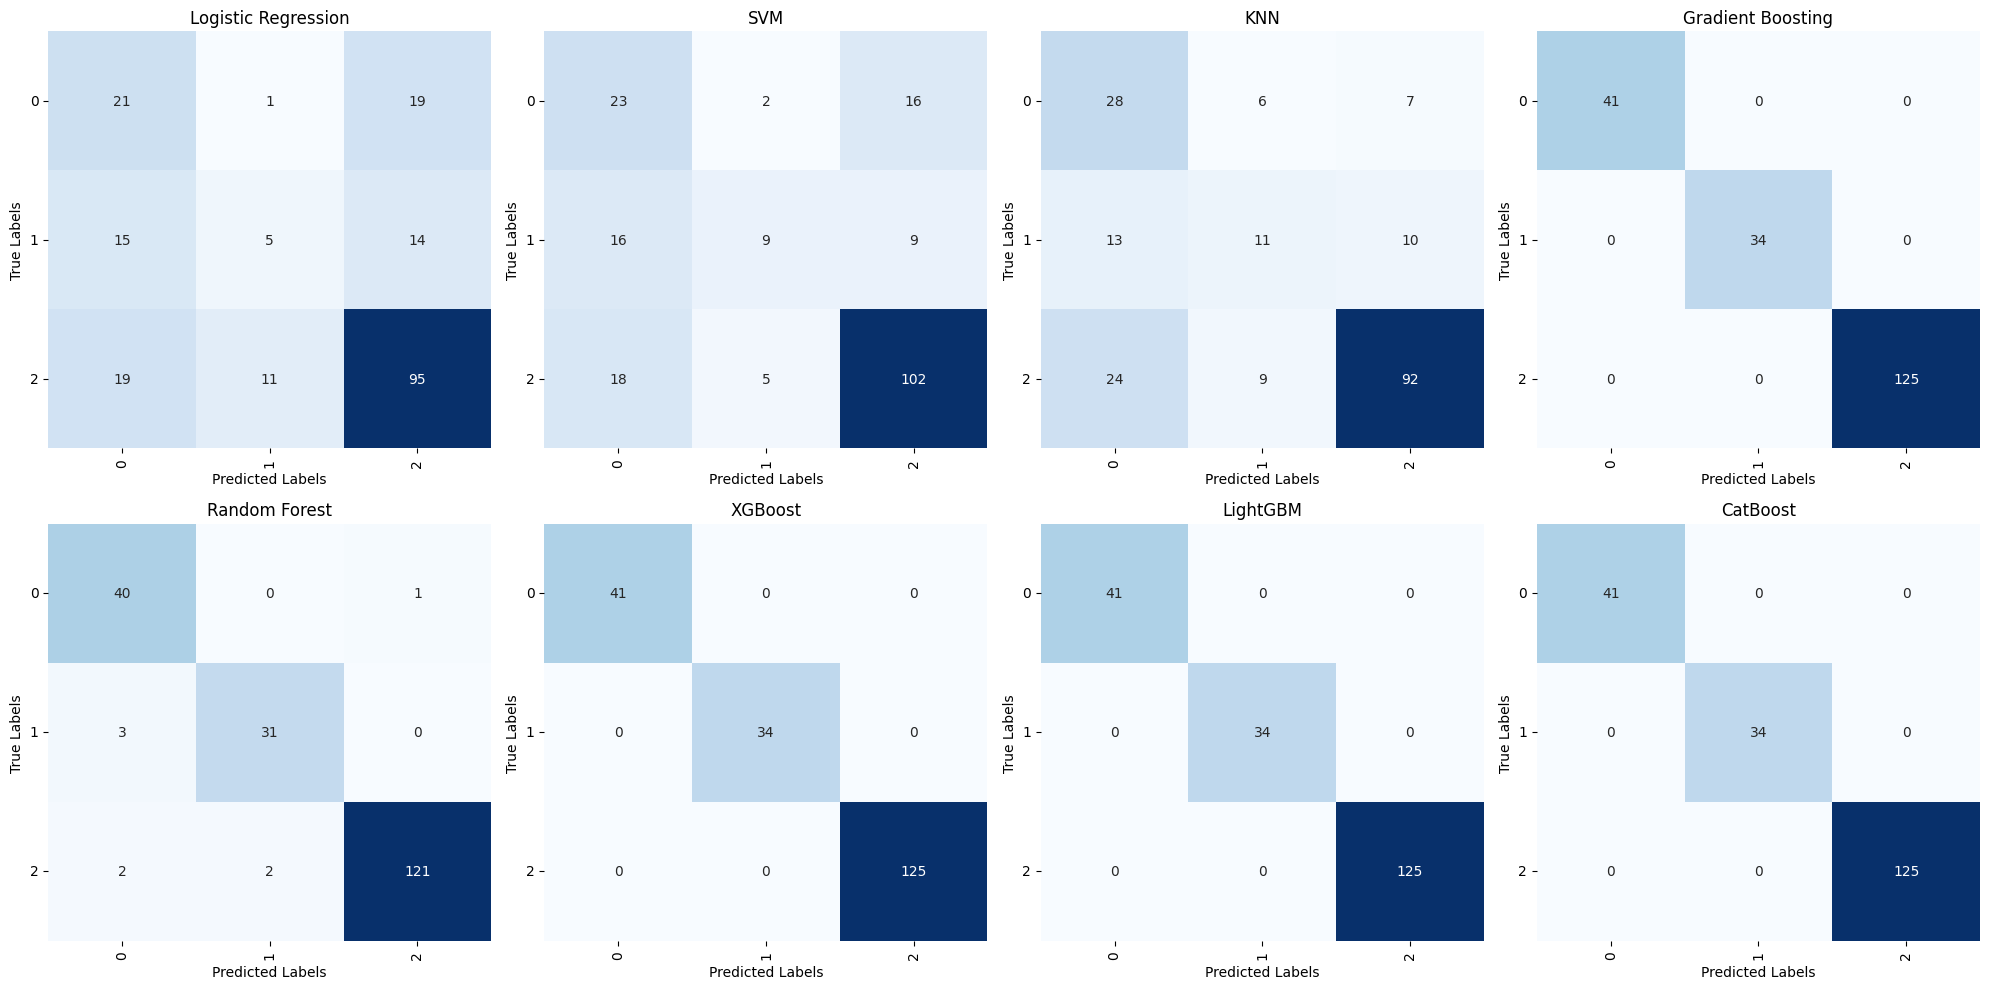

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, silent=True)
}

# Set up the plot grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # Adjust the grid size if necessary
axes = axes.ravel()

# Loop through each model, fit it, calculate metrics, and plot confusion matrix
for i, (model_name, model) in enumerate(models.items()):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_test_pred = model.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel("Predicted Labels")
    axes[i].set_ylabel("True Labels")
    axes[i].set_xticklabels(range(len(cm)), rotation=90)
    axes[i].set_yticklabels(range(len(cm)), rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()


### 7.2 Displaying all models Accuracy	F1, Score, Recall, Precision

In [41]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, silent=True)
}

# Initialize an empty list to store results
results = []

# Loop through each model, fit it, and calculate metrics
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')  # Adjust average method if needed
    recall = recall_score(y_test, y_test_pred, average='weighted')  # Adjust average method if needed
    precision = precision_score(y_test, y_test_pred, average='weighted')  # Adjust average method if needed
    
    # Append the results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Recall": recall,
        "Precision": precision
    })

# Convert the results into a DataFrame for easier comparison
results_df = pd.DataFrame(results)




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 882
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.694179
[LightGBM] [Info] Start training from score -0.568720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

Printing the results

In [42]:
results_df

,Model,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,0.605,0.592388,0.605,0.592140
1,SVM,0.670,0.663377,0.670,0.680313
2,KNN,0.655,0.662088,0.655,0.687754
3,Gradient Boosting,1.000,1.000000,1.000,1.000000
4,Random Forest,0.960,0.960359,0.960,0.961796
5,XGBoost,1.000,1.000000,1.000,1.000000
6,LightGBM,1.000,1.000000,1.000,1.000000
7,CatBoost,1.000,1.000000,1.000,1.000000


Sorting the datafram on accuracy

In [43]:
sorted_result=results_df.sort_values(by=['Accuracy'],ascending=False).reset_index(drop=True)

Dispalying Sorted Results

In [44]:
sorted_result

,Model,Accuracy,F1 Score,Recall,Precision
0,Gradient Boosting,1.000,1.000000,1.000,1.000000
1,XGBoost,1.000,1.000000,1.000,1.000000
2,LightGBM,1.000,1.000000,1.000,1.000000
3,CatBoost,1.000,1.000000,1.000,1.000000
4,Random Forest,0.960,0.960359,0.960,0.961796
5,SVM,0.670,0.663377,0.670,0.680313
6,KNN,0.655,0.662088,0.655,0.687754
7,Logistic Regression,0.605,0.592388,0.605,0.592140


In [45]:
xgb_model.predict([[80,0,13.8,113,7,4,22.0,43,21.7]])

array([2], dtype=int64)

In [46]:
# Save the model for later use
joblib.dump(xgb_model, "../models/health_risk_prediction_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
